# Mount Pinatubo

### Import Necessary Packages

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import pytz
sns.set(style="darkgrid")

### Read in Data

In [51]:
df = pd.read_csv('EarthquakeData.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-04-26T23:20:43.982Z,15.5760,119.3247,10.00,4.6,mb,NaN,102.0,7.391,0.71,...,2019-04-27T00:13:43.040Z,"61km WSW of Bolitoc, Philippines",earthquake,9.8,1.9,0.053,106.0,reviewed,us,us
1,2019-04-26T23:14:09.859Z,15.5718,119.1792,10.00,4.4,mb,NaN,100.0,9.905,0.59,...,2019-05-10T23:15:56.040Z,"76km SW of Ilioilio, Philippines",earthquake,11.0,1.8,0.066,67.0,reviewed,us,us
2,2019-04-23T18:02:59.987Z,14.9108,120.5743,53.44,4.7,mb,NaN,118.0,7.879,0.75,...,2019-04-24T16:10:44.505Z,"1km ESE of Santa Cruz, Philippines",earthquake,9.1,7.5,0.046,144.0,reviewed,us,us
3,2019-04-22T15:38:40.496Z,13.7277,120.9237,142.31,4.3,mb,NaN,145.0,14.129,0.46,...,2019-05-05T15:26:59.040Z,"1km SW of Talaga, Philippines",earthquake,21.9,11.6,0.169,10.0,reviewed,us,us
4,2019-04-22T09:11:11.751Z,14.9566,120.5121,20.00,6.1,mww,NaN,20.0,0.943,1.04,...,2019-05-22T13:15:42.040Z,"0km ESE of Gutad, Philippines",earthquake,5.9,1.8,0.035,77.0,reviewed,us,us


In [52]:
print(list(df.columns))

['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource']


In [53]:
df = df.loc[:,:'place']
df.drop(columns = ['nst','gap','dmin','rms','net','id','updated','magType'],inplace=True)
df.head()

,time,latitude,longitude,depth,mag,place
0,2019-04-26T23:20:43.982Z,15.5760,119.3247,10.00,4.6,"61km WSW of Bolitoc, Philippines"
1,2019-04-26T23:14:09.859Z,15.5718,119.1792,10.00,4.4,"76km SW of Ilioilio, Philippines"
2,2019-04-23T18:02:59.987Z,14.9108,120.5743,53.44,4.7,"1km ESE of Santa Cruz, Philippines"
3,2019-04-22T15:38:40.496Z,13.7277,120.9237,142.31,4.3,"1km SW of Talaga, Philippines"
4,2019-04-22T09:11:11.751Z,14.9566,120.5121,20.00,6.1,"0km ESE of Gutad, Philippines"


In [108]:
df['time'] = pd.to_datetime(df['time'],utc = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1778 entries, 0 to 1969
Data columns (total 6 columns):
time         1778 non-null datetime64[ns, UTC]
latitude     1778 non-null float64
longitude    1778 non-null float64
depth        1778 non-null float64
mag          1778 non-null float64
place        1778 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), object(1)
memory usage: 97.2+ KB


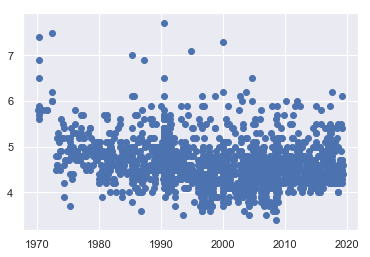

In [233]:
plt.scatter(df['time'],df['mag'])

In [106]:
df = df.query('mag > 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1778 entries, 0 to 1969
Data columns (total 6 columns):
time         1778 non-null datetime64[ns, UTC]
latitude     1778 non-null float64
longitude    1778 non-null float64
depth        1778 non-null float64
mag          1778 non-null float64
place        1778 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), object(1)
memory usage: 97.2+ KB


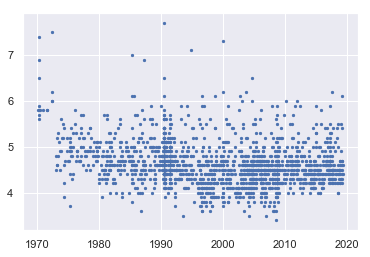

In [234]:
#sns.set(style="whitegrid")
plt.scatter(df['time'],df['mag'],s = 5)

In [203]:
df.set_index('time')

dt1 = dt.datetime(1990, 6, 1, 0, 0, 0, 0, pytz.UTC)
print(dt1)
dt2 = dt.datetime(1991, 6, 20, 0, 0, 0, 0, pytz.UTC)


df1991 = df.loc[(df['time'] > dt1) & (df['time'] < dt2)]

df1991.head(15)
#df1991 = df.loc[df['time'].dt.year == 1991]

1990-06-01 00:00:00+00:00


,time,latitude,longitude,depth,mag,place
1315,1991-06-19 03:06:42.850000+00:00,15.001,120.034,10.0,4.4,"Luzon, Philippines"
1316,1991-06-18 20:17:48.520000+00:00,15.231,120.293,10.0,4.8,"Luzon, Philippines"
1317,1991-06-18 03:20:25.310000+00:00,15.219,120.322,10.0,4.9,"Luzon, Philippines"
1318,1991-06-17 23:10:02.850000+00:00,15.203,120.393,10.0,4.2,"Luzon, Philippines"
1319,1991-06-17 17:14:42.380000+00:00,15.615,120.479,10.0,4.4,"Luzon, Philippines"
1320,1991-06-17 16:37:52.820000+00:00,15.193,120.250,10.0,4.6,"Luzon, Philippines"
1321,1991-06-17 15:33:01.700000+00:00,15.211,120.340,10.0,4.8,"Luzon, Philippines"
1322,1991-06-17 03:02:39.870000+00:00,15.322,120.817,10.0,4.1,"Luzon, Philippines"
1323,1991-06-16 20:40:40.570000+00:00,15.170,120.323,10.0,5.2,"Luzon, Philippines"
1324,1991-06-16 20:37:20.310000+00:00,15.080,120.585,10.0,5.5,"Luzon, Philippines"


(array([726649., 726711., 726772., 726833., 726892., 726953., 727014.]),
 <a list of 7 Text xticklabel objects>)

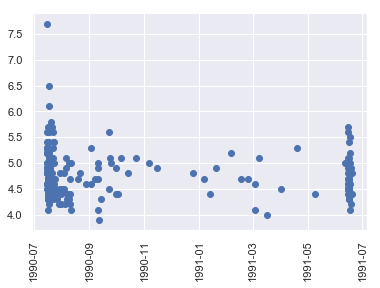

In [204]:
plt.scatter(df1991['time'],df1991['mag'])
plt.xticks(rotation=90)

In [152]:
df1 = pd.read_csv('VolcanicForcing.csv')
df1.head()

,2.8,5.6,8.4,11.2,14,16.8,19.6,22.4,25.2,28,...,154,156.8,159.6,162.4,165.2,168,170.8,173.6,176.4,179.2
0,0.003435,0.003435,0.003435,0.003435,0.003435,0.003435,0.003435,0.003435,0.003435,0.003435,...,0.003435,0.003435,0.003435,0.003435,0.002935,0.002265,0.002265,0.002265,0.002265,0.002265
1,0.003161,0.003161,0.003161,0.003161,0.003161,0.003161,0.003161,0.003161,0.003161,0.003161,...,0.003161,0.003161,0.003161,0.003161,0.002629,0.001917,0.001917,0.001917,0.001917,0.001917
2,0.002676,0.002676,0.002676,0.002676,0.002676,0.002809,0.002908,0.002908,0.002908,0.002908,...,0.002908,0.002908,0.002908,0.002908,0.002358,0.001623,0.001623,0.001623,0.001623,0.001623
3,0.002265,0.002265,0.002265,0.002265,0.002265,0.015278,0.025000,0.025000,0.025000,0.025000,...,0.002676,0.002676,0.002676,0.002676,0.002676,0.002676,0.002676,0.002676,0.002676,0.002676
4,0.001917,0.001917,0.001917,0.001917,0.001917,0.029438,0.050000,0.050000,0.050000,0.050000,...,0.002462,0.002462,0.002462,0.002462,0.002462,0.002462,0.002462,0.002462,0.002462,0.002462


In [241]:
df1['year'] = df1.index/12 + 1890
df1['year'] = df1['year'].astype(int)
df1['month'] = df1.index % 12 + 1

#df1['date'] = str(df1['year'])+ str(df1['month'])
df1['date'] = pd.to_datetime(df1['year'].astype(str) + df1['month'].astype(str), format='%Y%m')

df1['total'] = df1.loc[:, '2.8':'179.2'].sum(1)

df1.head(15)


,2.8,5.6,8.4,11.2,14,16.8,19.6,22.4,25.2,28,...,165.2,168,170.8,173.6,176.4,179.2,year,month,total,date
0,0.003435,0.003435,0.003435,0.003435,0.003435,0.003435,0.003435,0.003435,0.003435,0.003435,...,0.002935,0.002265,0.002265,0.002265,0.002265,0.002265,1890,1,0.158478,1890-01-01
1,0.003161,0.003161,0.003161,0.003161,0.003161,0.003161,0.003161,0.003161,0.003161,0.003161,...,0.002629,0.001917,0.001917,0.001917,0.001917,0.001917,1890,2,0.144922,1890-02-01
2,0.002676,0.002676,0.002676,0.002676,0.002676,0.002809,0.002908,0.002908,0.002908,0.002908,...,0.002358,0.001623,0.001623,0.001623,0.001623,0.001623,1890,3,0.792486,1890-03-01
3,0.002265,0.002265,0.002265,0.002265,0.002265,0.015278,0.025000,0.025000,0.025000,0.025000,...,0.002676,0.002676,0.002676,0.002676,0.002676,0.002676,1890,4,1.819655,1890-04-01
4,0.001917,0.001917,0.001917,0.001917,0.001917,0.029438,0.050000,0.050000,0.050000,0.050000,...,0.002462,0.002462,0.002462,0.002462,0.002462,0.002462,1890,5,3.013800,1890-05-01
5,0.001623,0.001623,0.001623,0.001623,0.001623,0.043622,0.075000,0.075000,0.075000,0.075000,...,0.002265,0.002265,0.002265,0.002265,0.002265,0.002265,1890,6,4.112415,1890-06-01
6,0.001374,0.001374,0.001374,0.001374,0.001374,0.057824,0.100000,0.100000,0.100000,0.100000,...,0.002084,0.002084,0.002084,0.002084,0.002084,0.002084,1890,7,4.790981,1890-07-01
7,0.001163,0.001163,0.001163,0.001163,0.001163,0.072043,0.125000,0.125000,0.125000,0.125000,...,0.001917,0.001917,0.001917,0.001917,0.001917,0.001917,1890,8,4.870673,1890-08-01
8,0.000984,0.000984,0.000984,0.000984,0.000984,0.071967,0.125000,0.125000,0.125000,0.125000,...,0.001704,0.001623,0.001623,0.001623,0.001623,0.001623,1890,9,4.620313,1890-09-01
9,0.112500,0.112500,0.112500,0.112500,0.112500,0.112500,0.112500,0.112500,0.112500,0.112500,...,0.014897,0.001374,0.001374,0.001374,0.001374,0.001374,1890,10,5.112548,1890-10-01


In [208]:
rand = df1.query('year >1989 and year < 1995')

(array([686291., 693596., 700900., 708205., 715510., 722815., 730120.,
        737425.]), <a list of 8 Text xticklabel objects>)

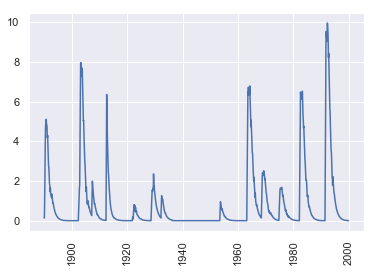

In [209]:
plt.plot(df1['date'],df1['total'])
plt.xticks(rotation=90)

(array([726103., 726468., 726833., 727198., 727564., 727929., 728294.]),
 <a list of 7 Text xticklabel objects>)

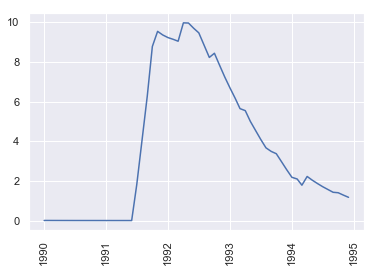

In [210]:
plt.plot(rand['date'],rand['total'])
plt.xticks(rotation = 90)

(array([727198., 727258., 727319., 727380., 727442., 727503.]),
 <a list of 6 Text xticklabel objects>)

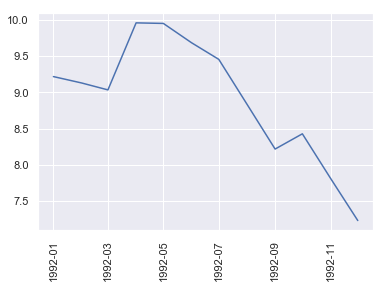

In [225]:
rand1 = df1.query('year > 1991 and year < 1993')
plt.plot(rand1['date'],rand1['total'])
plt.xticks(rotation = 90)

DESCRIPTION:  
Monthly volcanic forcing data for climate modeling from 1890-1999. 
Aerosol from each event is individually evolved spatially at monthly
resolution.  Latitude bands are 2.8 degrees. The peak aerosol optical 
depth for each eruption is scaled from estimates of peak aerosol
loading [Stothers 1996; Hofmann and Rosen 1983; Stenchikov
et al., 1998] assuming spherical sulfuric acid droplets
with a composition of 75% H2SO4 and 25% H2O and a
fixed aerosol size distribution (using reff = 0.42 micron
[Ammann et al., 2003], a mid-sized aerosol comparable to
an average Pinatubo aerosol, Stenchikov et al. [1998]; see
also Stothers [2001b] for estimates of reff for individual
events). Using the month of the eruption and an estimated
peak amount of sulfate aerosol reached through linear
buildup after 4 months, aerosol from tropical eruptions is
transported in the lower stratosphere from the tropics
(25N�25S) into the midlatitudes of the respective winter
hemisphere, where it subsequently decays during the summer
season. Over the poles, aerosol is rapidly removed
during winter, but is advected from midlatitudes in spring
and summer after the breakdown of the polar vortex. The
e-folding time for decay is set to 12 months in the tropics.
The aerosol from high-latitude eruptions is restricted to
remain poleward of 30 degrees of the appropriate hemisphere. 

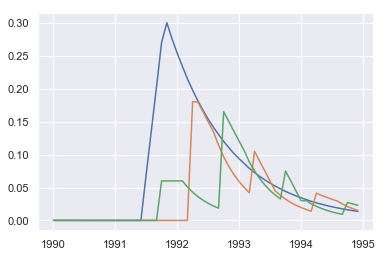

In [236]:
plt.figure(1)
plt.plot(rand['date'],rand['95.2'])
plt.plot(rand['date'],rand['179.2'])
plt.plot(rand['date'],rand['2.8'])
plt.show()

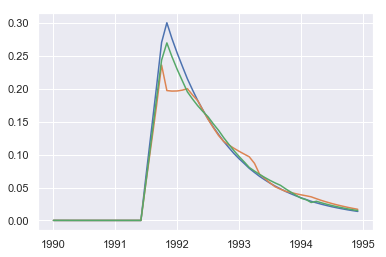

In [238]:
plt.figure(1)
plt.plot(rand['date'],rand['95.2'])
plt.plot(rand['date'],rand['123.2'])
plt.plot(rand['date'],rand['67.2'])
plt.show()

1991-05-01 00:00:00


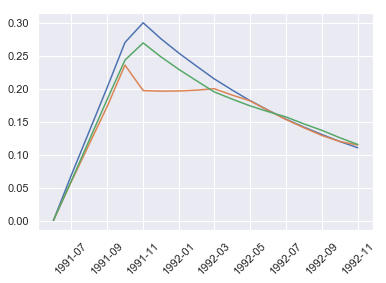

In [254]:
dt1 = dt.datetime(1991, 5, 1)
print(dt1)
dt2 = dt.datetime(1992, 12, 1)

rand2 = df1.loc[(df1['date'] > dt1) & (df1['date'] < dt2)]
#rand2 = df1.query('date == 1991-06-01')
plt.figure(1)
plt.plot(rand2['date'],rand2['95.2'])
plt.plot(rand2['date'],rand2['123.2'])
plt.plot(rand2['date'],rand2['67.2'])
# plt.plot(rand2['date'],rand2['151.2'])
# plt.plot(rand2['date'],rand2['39.2'])
plt.xticks(rotation = 45)
plt.show()

In [260]:
df2 = pd.read_csv('EruptionHist.csv')
df2.head()

,volcano,lat,lon,v_alt,yyyy,mm,dd,type,vei,p_alt_obs,p_alt_est,so2
0,Ambrym,-16.25,168.120,1.334,1978.0,12.0,5.0,exp,2.0,-999.0,11.334,87.0
1,Cerro_Azul,-0.92,-91.408,1.690,1979.0,2.0,1.0,eff,2.0,2.0,-999.000,10.0
2,Cerro_Azul,-0.92,-91.408,1.690,1979.0,2.0,2.0,eff,2.0,7.0,-999.000,60.0
3,Cerro_Azul,-0.92,-91.408,1.690,1979.0,2.0,3.0,eff,2.0,2.0,-999.000,40.0
4,Cerro_Azul,-0.92,-91.408,1.690,1979.0,2.0,4.0,eff,2.0,3.0,-999.000,10.0


Text(2000, 10000, 'Mount Pinatubo!')

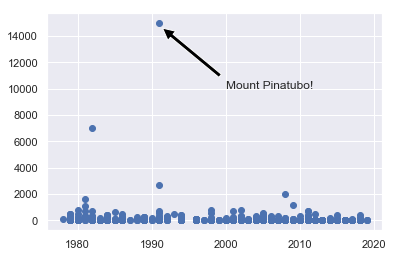

In [271]:
plt.scatter(df2['yyyy'],df2['so2'])
# Annotate with text + Arrow
plt.annotate('Mount Pinatubo!', xy=(1991, 14800), xytext=(2000, 10000),
arrowprops=dict(facecolor='black', shrink=0.05)
)